In [314]:
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 13

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

#def set():
#    np.random.seed(SEED)
#    random.seed(SEED)
#    tf.random.set_seed(SEED)

In [315]:
path = 'PokemonData/Abra/2eb2a528f9a247358452b3c740df69a0.jpg'
img = Image.open(path)
array = np.array(img)
print(array.shape)

def load_images(datagenerator, path, labels, img_width, img_height, batch_size=5, seed=SEED):
    train_data = datagenerator.flow_from_directory(path, 
                                                   target_size=(img_w, img_h), 
                                                   batch_size=batch_size, 
                                                   subset='training', 
                                                   classes=labels)#,
                                                   #seed = SEED)

    validation_data = datagenerator.flow_from_directory(path, 
                                                        target_size=(img_width, img_height), 
                                                        batch_size=batch_size, 
                                                        subset='validation',
                                                        classes=labels)#, 
                                                        #seed=SEED)
    
    return train_data, validation_data


path = 'PokemonData/'
img_w = 200
img_h = 200

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

(238, 226, 3)


## Starter pokemons

First we'll train a smaller model to be able to classify the three different starter pokemons: Bulbasaur, Charmander and Squirtle.

In [316]:
#set()


labels_starter = ['Bulbasaur', 'Charmander', 'Squirtle']


'''
train_starter = datagen.flow_from_directory(path, 
                                            target_size=(img_w, img_h), 
                                            batch_size=5, 
                                            subset='training', 
                                            classes=labels_starter,
                                            seed = SEED)

val_starter = datagen.flow_from_directory(path, 
                                          target_size=(img_w, img_h), 
                                          batch_size=5, 
                                          subset='validation',
                                          classes=labels_starter, 
                                          seed=SEED)
'''

train_starter, val_starter = load_images(datagen, path, labels_starter, img_width=img_w, img_height=img_h)

Found 130 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


Let's plot one batch of training data:

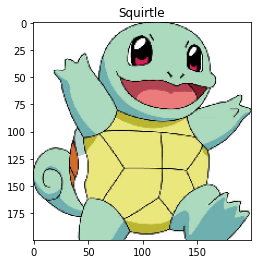

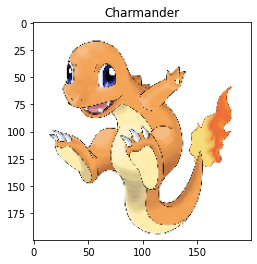

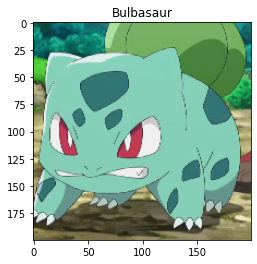

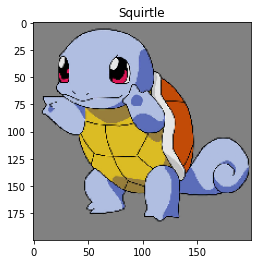

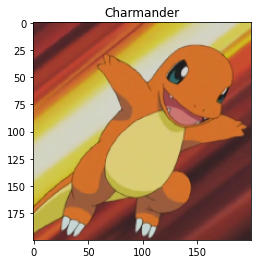

In [317]:
x, y = next(train_starter)

for x,y in zip(x, y):
    plt.imshow(x)
    plt.title(labels_starter[np.argmax(y)])
    plt.show()

In [318]:
#set()

model_starter = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(img_w, img_h, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=len(labels_starter), activation='softmax')
])

model_starter.compile(optimizer='adam',
                     loss=tf.losses.CategoricalCrossentropy(),
                     metrics=['accuracy'])

history_starter = model_starter.fit(train_starter,
                                    epochs=5,
                                    #steps_per_epoch=num_train_samples // batch_size,
                                    validation_data=val_starter,
                                    #validation_steps=num_test_samples // batch_size, 
                                    verbose=1)

Epoch 1/5
26/26 [==============================] - 3s 92ms/step - loss: 12.9205 - accuracy: 0.3980 - val_loss: 0.0785 - val_accuracy: 0.9286
Epoch 2/5
26/26 [==============================] - 2s 86ms/step - loss: 0.3304 - accuracy: 0.8820 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 3/5
26/26 [==============================] - 2s 90ms/step - loss: 0.0148 - accuracy: 0.9947 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 4/5
26/26 [==============================] - 2s 71ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 5/5
26/26 [==============================] - 2s 82ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 1.0000


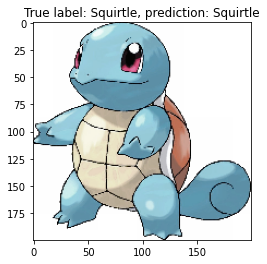

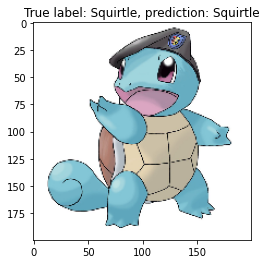

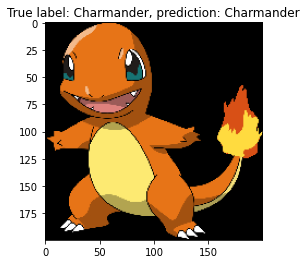

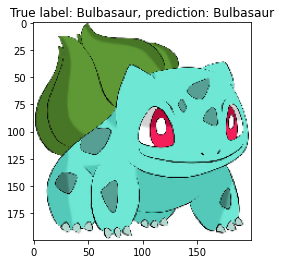

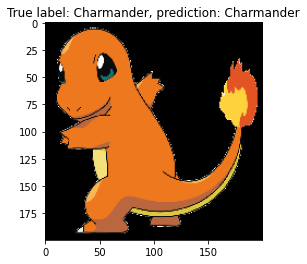

3/3 [==============================] - 0s 55ms/step - loss: 0.0396 - accuracy: 1.0000


In [327]:
x_starter, y_starter = next(val_starter)

pred_starter = model_starter.predict(x_starter)

for x, y, pred in zip(x_starter, y_starter, pred_starter):
    plt.imshow(x)
    plt.title("True label: {}, prediction: {}".format(labels_starter[y.argmax()], labels_starter[pred.argmax()]))
    plt.show()
    
eval_starter = model_starter.evaluate(val_starter)

Great, with a simple two layer CNN we already get 100 % accuracy on both the training and validation data. This task is expectedly easy, since the three starter pokemons are so distinct in both their shapes and colors. Let's increase the difficulty a bit and next train a model that classifies the starter pokemons and all their evolutions.


### Starter pokemons and their evolutions

In [320]:
#set()

labels_evo = ['Bulbasaur', 'Ivysaur', 'Venosaur', 
              'Charmander', 'Charmeleon', 'Charizard', 
              'Squirtle', 'Wartortle', 'Blastoise']

#print(len(labels))
#print(labels)

#img_w = 100
#img_h = 100

#datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
'''
train_evo = datagen.flow_from_directory(path, 
                                        target_size=(img_w, img_h), 
                                        batch_size=5, 
                                        subset='training', 
                                        classes=labels_evo,
                                        seed=SEED)

val_evo = datagen.flow_from_directory(path, 
                                      target_size=(img_w, img_h), 
                                      batch_size=5, 
                                      subset='validation',
                                      classes=labels_evo,
                                      seed=SEED)
'''

train_evo, val_evo = load_images(datagen, path, labels_evo, img_width=img_w, img_height=img_h)

Found 322 images belonging to 9 classes.
Found 33 images belonging to 9 classes.


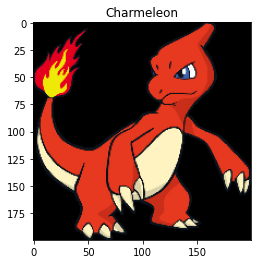

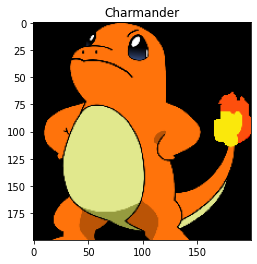

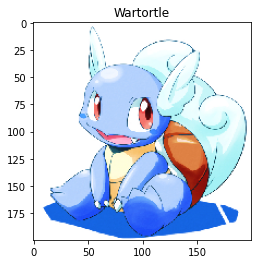

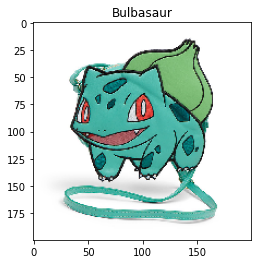

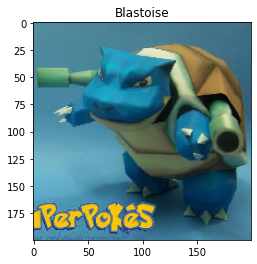

In [321]:
x, y = next(train_evo)

for x,y in zip(x, y):
    plt.imshow(x)
    plt.title(labels_evo[np.argmax(y)])
    plt.show()

In [322]:
#set()

model_evo = keras.Sequential([
    #keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(img_w, img_h, 3), activation='relu'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.Conv2D(filters=32, input_shape=(img_w, img_h, 3), kernel_size=3, activation='relu'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    #keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=len(labels_evo), activation='softmax')
])

model_evo.compile(optimizer='adam',
             loss=tf.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

history_evo = model_evo.fit(train_evo,
                            epochs=10,
                            #steps_per_epoch=num_train_samples // batch_size,
                            validation_data=val_evo,
                            #validation_steps=num_test_samples // batch_size, 
                            verbose=1)

Epoch 1/10
65/65 [==============================] - 7s 102ms/step - loss: 4.3441 - accuracy: 0.1960 - val_loss: 0.9881 - val_accuracy: 0.5152
Epoch 2/10
65/65 [==============================] - 6s 99ms/step - loss: 0.6930 - accuracy: 0.7712 - val_loss: 0.5244 - val_accuracy: 0.8485
Epoch 3/10
65/65 [==============================] - 7s 101ms/step - loss: 0.3074 - accuracy: 0.9158 - val_loss: 0.4324 - val_accuracy: 0.8788
Epoch 4/10
65/65 [==============================] - 7s 103ms/step - loss: 0.0773 - accuracy: 0.9983 - val_loss: 0.2547 - val_accuracy: 0.9091
Epoch 5/10
65/65 [==============================] - 6s 100ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 0.8788
Epoch 6/10
65/65 [==============================] - 7s 101ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1599 - val_accuracy: 0.9394
Epoch 7/10
65/65 [==============================] - 7s 100ms/step - loss: 8.8131e-04 - accuracy: 1.0000 - val_loss: 0.1489 - val_accuracy: 0.9697
Epo

INFO:tensorflow:Assets written to: Saved_models/Model_evo\assets


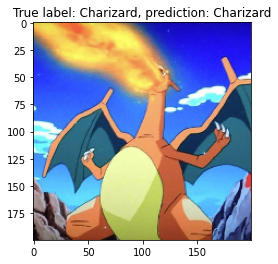

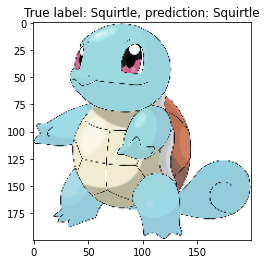

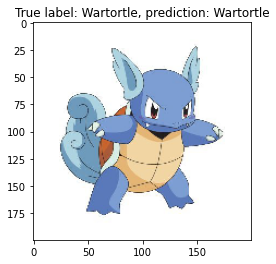

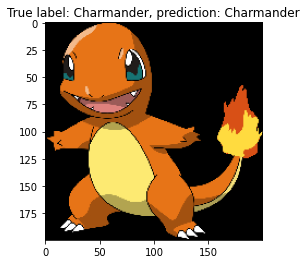

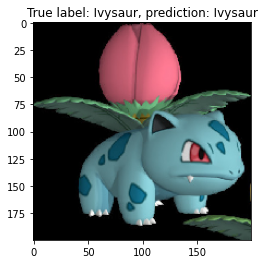

7/7 [==============================] - 0s 45ms/step - loss: 0.1252 - accuracy: 0.9697


In [331]:

#model_evo.save('Saved_models/Model_evo')
#model_evo = keras.models.load_model('Saved_models/Model_evo')

x_evo, y_evo = next(val_evo)

pred_evo = model_evo.predict(x_evo)

for x, y, pred in zip(x_evo, y_evo, pred_evo):
    plt.imshow(x)
    plt.title("True label: {}, prediction: {}".format(labels_evo[y.argmax()], labels_evo[pred.argmax()]))
    plt.show()
    
    
eval_evo = model_evo.evaluate(val_evo)

INFO:tensorflow:Assets written to: Saved_models\assets
